# **1. Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

2025-05-29 13:23:01.028628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748524981.311160      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748524981.383322      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
df_1 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_DNS.csv')
df_2 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_LDAP.csv')
df_3 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_MSSQL.csv')
df_4 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_NTP.csv')
df_5 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_NetBIOS.csv')
df_6 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_SNMP.csv')
df_7 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_SSDP.csv')
df_8 = pd.read_csv('/kaggle/input/cic-ddos2019/DrDoS_UDP.csv')
df_9 = pd.read_csv('/kaggle/input/cic-ddos2019/Syn.csv')
df_10 = pd.read_csv('/kaggle/input/cic-ddos2019/TFTP.csv')
df_11 = pd.read_csv('/kaggle/input/cic-ddos2019/UDPLag.csv')

In [3]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    11000 non-null  int64  
 1   Flow ID                       11000 non-null  object 
 2    Source IP                    11000 non-null  object 
 3    Source Port                  11000 non-null  int64  
 4    Destination IP               11000 non-null  object 
 5    Destination Port             11000 non-null  int64  
 6    Protocol                     11000 non-null  int64  
 7    Timestamp                    11000 non-null  object 
 8    Flow Duration                11000 non-null  int64  
 9    Total Fwd Packets            11000 non-null  int64  
 10   Total Backward Packets       11000 non-null  int64  
 11  Total Length of Fwd Packets   11000 non-null  float64
 12   Total Length of Bwd Packets  11000 non-null  float64
 13   

In [5]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


# **2. Data Pre-processing**

In [6]:
encoders = {}

for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    11000 non-null  int64  
 1   Flow ID                       11000 non-null  int64  
 2    Source IP                    11000 non-null  int64  
 3    Source Port                  11000 non-null  int64  
 4    Destination IP               11000 non-null  int64  
 5    Destination Port             11000 non-null  int64  
 6    Protocol                     11000 non-null  int64  
 7    Timestamp                    11000 non-null  int64  
 8    Flow Duration                11000 non-null  int64  
 9    Total Fwd Packets            11000 non-null  int64  
 10   Total Backward Packets       11000 non-null  int64  
 11  Total Length of Fwd Packets   11000 non-null  float64
 12   Total Length of Bwd Packets  11000 non-null  float64
 13   

In [7]:
df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    11000 non-null  float64
 1   Flow ID                       11000 non-null  float64
 2    Source IP                    11000 non-null  float64
 3    Source Port                  11000 non-null  float64
 4    Destination IP               11000 non-null  float64
 5    Destination Port             11000 non-null  float64
 6    Protocol                     11000 non-null  float64
 7    Timestamp                    11000 non-null  float64
 8    Flow Duration                11000 non-null  float64
 9    Total Fwd Packets            11000 non-null  float64
 10   Total Backward Packets       11000 non-null  float64
 11  Total Length of Fwd Packets   11000 non-null  float64
 12   Total Length of Bwd Packets  11000 non-null  float64
 13   

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425.0,6202.0,3.0,634.0,53.0,60495.0,17.0,1000.0,28415.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,430.0,4730.0,23.0,634.0,12.0,60495.0,17.0,1001.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1654.0,6071.0,3.0,634.0,53.0,46391.0,17.0,1002.0,48549.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2927.0,5744.0,3.0,634.0,53.0,11894.0,17.0,1003.0,48337.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,694.0,5886.0,3.0,634.0,53.0,27878.0,17.0,1004.0,32026.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   11000 non-null  float64
 1   Flow ID                      11000 non-null  float64
 2   Source IP                    11000 non-null  float64
 3   Source Port                  11000 non-null  float64
 4   Destination IP               11000 non-null  float64
 5   Destination Port             11000 non-null  float64
 6   Protocol                     11000 non-null  float64
 7   Timestamp                    11000 non-null  float64
 8   Flow Duration                11000 non-null  float64
 9   Total Fwd Packets            11000 non-null  float64
 10  Total Backward Packets       11000 non-null  float64
 11  Total Length of Fwd Packets  11000 non-null  float64
 12  Total Length of Bwd Packets  11000 non-null  float64
 13  Fwd Packet Lengt

outliers

In [9]:
z_scores = np.abs(zscore(df.select_dtypes(include='number')))

outliers = (z_scores > 3)

outliers_sum = outliers.sum(axis=0)
print("Outliers por coluna:")
print(pd.Series(outliers_sum, index=df.select_dtypes(include='number').columns))

Outliers por coluna:
Unnamed: 0         335
Flow ID              0
Source IP           96
Source Port          0
Destination IP     434
                  ... 
Idle Max           325
Idle Min            97
SimillarHTTP        66
Inbound           1077
Label                0
Length: 88, dtype: int64


/tmp/ipykernel_35/2559706930.py:3: RuntimeWarning: invalid value encountered in greater
  outliers = (z_scores > 3)


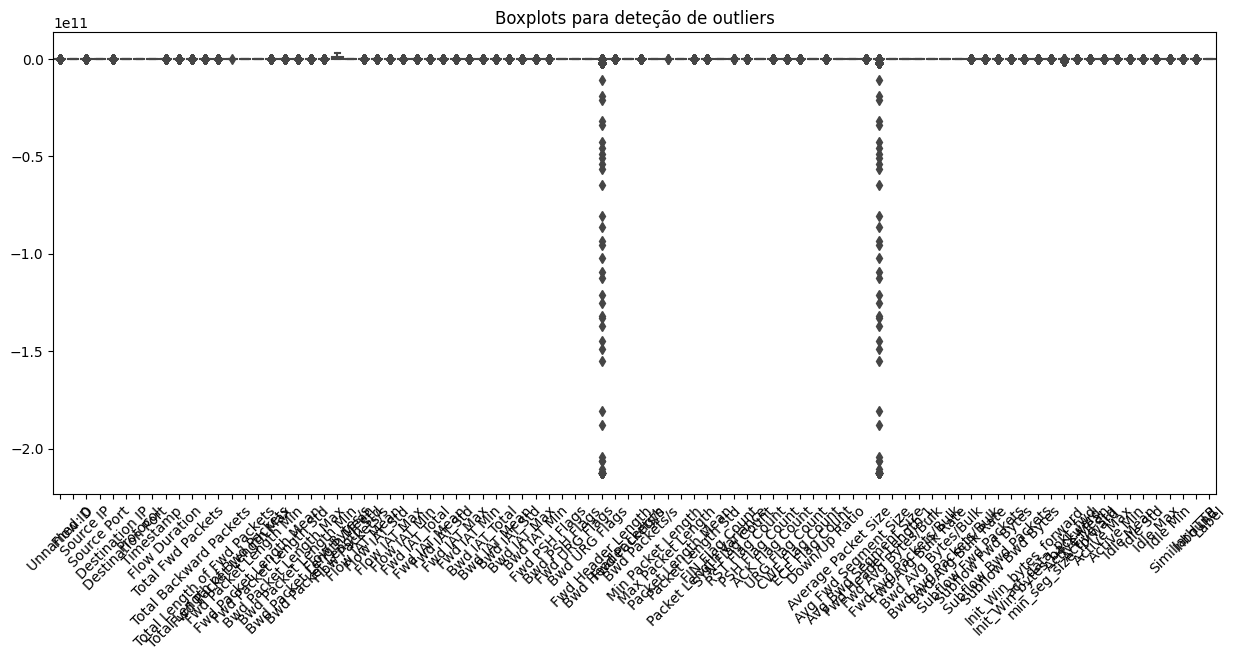

In [10]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Boxplots para deteção de outliers")
plt.show()

In [11]:
X_isolation = df.select_dtypes(include='number')

iso = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso.fit_predict(X_isolation)

df['Outlier'] = (outlier_pred == -1).astype(int)

print("Total de outliers encontrados:", df['Outlier'].sum())

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total de outliers encontrados: 550


In [12]:
df[df['Outlier'] == 1]

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,Outlier
17,122.0,0.0,3.0,0.0,53.0,0.0,0.0,1017.0,119819608.0,1014.0,...,4024592.0,1027317.0,5.914329e+06,1.729588e+05,5975581.0,5486278.0,0.0,1.0,1.0,1
22,0.0,3197.0,23.0,22.0,12.0,48621.0,6.0,1022.0,5197051.0,10.0,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1
27,123.0,10321.0,28.0,59099.0,6.0,80.0,6.0,1027.0,110861755.0,26.0,...,392446.0,179351.0,9.863210e+06,4.131718e+05,10007500.0,8632089.0,11.0,0.0,0.0,1
31,23.0,10448.0,28.0,59102.0,103.0,443.0,6.0,1031.0,40335006.0,9.0,...,90287.0,90185.0,9.993447e+06,4.049575e+04,10018634.0,9933709.0,0.0,0.0,0.0,1
53,126.0,9816.0,24.0,0.0,68.0,0.0,0.0,1053.0,113244633.0,56.0,...,2978061.0,4.0,9.188876e+06,8.099017e+05,9882838.0,6781893.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,302044.0,3385.0,3.0,50705.0,53.0,50705.0,6.0,9982.0,111242399.0,12.0,...,49.0,1.0,2.224846e+07,9.600536e+06,36144155.0,11272367.0,0.0,1.0,9.0,1
8987,147151.0,7448.0,3.0,7874.0,53.0,7874.0,6.0,9984.0,115140163.0,18.0,...,2133190.0,1.0,1.614383e+07,3.852884e+06,23003180.0,11599462.0,0.0,1.0,9.0,1
8993,385608.0,6357.0,3.0,64353.0,53.0,64353.0,6.0,9990.0,119729164.0,14.0,...,66.0,1.0,1.995484e+07,7.935669e+06,27431058.0,8372439.0,0.0,1.0,9.0,1
8996,767344.0,356.0,3.0,26219.0,53.0,26219.0,6.0,9993.0,119806863.0,16.0,...,79.0,1.0,1.711525e+07,7.414556e+06,32290746.0,8609625.0,0.0,1.0,9.0,1


In [13]:
df = df[df['Outlier'] == 0].drop(columns='Outlier')

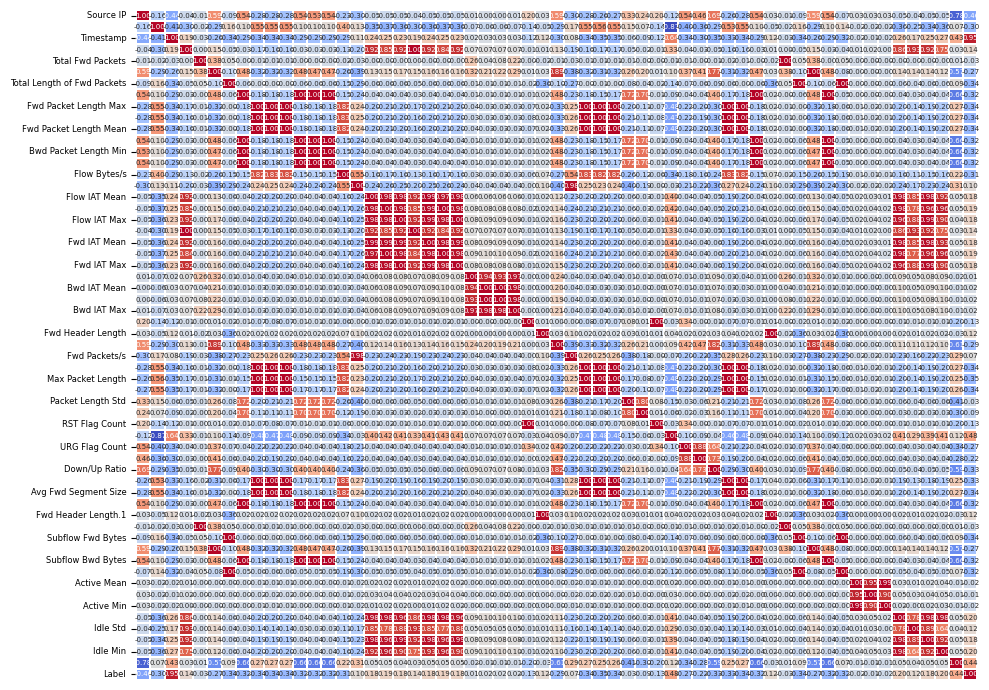

In [14]:
corr_matrix = df.corr().abs()  

np.fill_diagonal(corr_matrix.values, 0)

max_corr = corr_matrix.max()

limiar = 0.7
interesting_colunms = max_corr[max_corr > limiar].index.tolist()

df_filtered  = df[interesting_colunms]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.3, 
    annot_kws={"size": 5}, 
    cbar=False
)
plt.yticks(rotation=0, ha='right', fontsize=6)
plt.xticks([], [])
plt.tight_layout()
plt.savefig("matriz_correlacao.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()


# **3. Machine Learning Models Training**

In [15]:
X = df.drop(columns=['Label'])
y = df['Label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4.1 Clustering**

In [17]:
#df_clustering = df.copy()

#X_clutering = df_clustering.drop('Label', axis=1)

#scaler = MinMaxScaler()
#X_clutering_scaled = scaler.fit_transform(X_clutering)

#k = 5
#kmeans = KMeans(n_clusters=k, random_state=42)
#clusters = kmeans.fit_predict(X_clutering_scaled)

#df_clustering['Cluster'] = clusters

#score = silhouette_score(X_clutering_scaled, clusters)
#print(f"Silhouette Score para k={k}: {score:.4f}")

In [18]:
#inertia = []
#K_range = range(1, 11)

#for k in K_range:
   # km = KMeans(n_clusters=k, random_state=42)
   # km.fit(X_clutering_scaled)
   # inertia.append(km.inertia_)

#plt.figure(figsize=(8, 4))
#plt.plot(K_range, inertia, 'bo-')
#plt.xlabel('Número de Clusters (k)')
#plt.ylabel('Inércia')
#plt.title('Método do Cotovelo')
#plt.show()

## **4.2 Classification Models**

### **4.2.1 Random Forest**

In [19]:
rf_model_cla = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model_cla.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

### **4.2.2 Decision Tree**

In [20]:
dt_model_cla = DecisionTreeClassifier(max_depth=500, min_samples_split=5,random_state=42)
dt_model_cla.fit(X_train, y_train)

tree_text = export_text(dt_model_cla, feature_names=X_train.columns.tolist())

with open("arvore_decisao.txt", "w", encoding="utf-8") as f:
    f.write(tree_text)

### **4.2.3 KNN**

In [21]:
knn_model_cla = KNeighborsClassifier(n_neighbors=5)
knn_model_cla.fit(X_train, y_train)

KNeighborsClassifier()

### **4.2.3 Naive Bayes**

In [22]:
nb_model_cla = GaussianNB()
nb_model_cla.fit(X_train, y_train)

GaussianNB()

### **4.2.4 Logistic Regression**

In [23]:
lr_model_cla = LogisticRegression(max_iter=10000)
lr_model_cla.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000)

### **4.2.4 SVM**

In [24]:
svm_model_cla = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model_cla.fit(X_train, y_train)

SVC(random_state=42)

### **4.2.4 Gradient Boosting**

In [25]:
gb_model_cla = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_cla.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### **4.2.4 AdaBoost**

In [26]:
ada_model_cla = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_model_cla.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [27]:
catboost_model_cla = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_seed=42
)

catboost_model_cla.fit(X_train, y_train)

In [28]:
import re

# Função para limpar nomes das colunas
def clean_column_names(df):
    df.columns = [re.sub(r'[^\w]', '_', col) for col in df.columns]
    return df

X_train_lgbm = X_train.copy()
X_test_lgbm = X_test.copy()

X_train_lgbm = clean_column_names(X_train_lgbm)
X_test_lgbm = clean_column_names(X_test_lgbm)

lgbm_model_cla = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    random_state=42
)

lgbm_model_cla.fit(X_train_lgbm, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8318
[LightGBM] [Info] Number of data points in the train set: 8360, number of used features: 72
[LightGBM] [Info] Start training from score -2.596667
[LightGBM] [Info] Start training from score -2.842950
[LightGBM] [Info] Start training from score -2.344105
[LightGBM] [Info] Start training from score -2.320691
[LightGBM] [Info] Start training from score -3.931347
[LightGBM] [Info] Start training from score -2.370639
[LightGBM] [Info] Start training from score -2.344105
[LightGBM] [Info] Start training from score -2.352872
[LightGBM] [Info] Start training from score -2.314619
[LightGBM] [Info] Start training from score -2.537460
[LightGBM] [Info] Start training from score -2.364257
[LightGBM] [Info] Start training from score -2.331713


LGBMClassifier(max_depth=10, random_state=42)

In [29]:
from xgboost import XGBClassifier

import re

def clean_column_names(df):
    df.columns = [re.sub(r'[^\w]', '_', col) for col in df.columns]
    return df

X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

X_train_xgb = clean_column_names(X_train_xgb)
X_test_xgb = clean_column_names(X_test_xgb)

xgb_model_cla = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='mlogloss',  
    random_state=42
)

xgb_model_cla.fit(X_train_xgb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

### **4.2.5 RNN**

In [30]:
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

#X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
#X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#num_classes = len(np.unique(y))
#y_train_cat = to_categorical(y_train, num_classes)
#y_test_cat = to_categorical(y_test, num_classes)

In [31]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(units=64, input_shape=(1, X_train_scaled.shape[1]), activation='tanh'))
#rnn_model.add(Dense(units=num_classes, activation='softmax'))  # saída multiclasse

#rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#history = rnn_model.fit(X_train_rnn, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test_rnn, y_test_cat))

In [32]:
#y_pred_probs = rnn_model.predict(X_test_rnn)
#y_pred = np.argmax(y_pred_probs, axis=1)

#print(classification_report(y_test_scaled, y_pred))

# **5. Comparison Between Machine Learning Models**

### **5.1. Classification Models**

In [33]:
def calculate_classification_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]

In [34]:
svm_cla = calculate_classification_metrics(svm_model_cla, X_test, y_test)
knn_cla = calculate_classification_metrics(knn_model_cla, X_test, y_test)
nb_cla = calculate_classification_metrics(nb_model_cla, X_test, y_test)
dt_cla = calculate_classification_metrics(dt_model_cla, X_test, y_test)
rf_cla = calculate_classification_metrics(rf_model_cla, X_test, y_test)
lr_cla = calculate_classification_metrics(lr_model_cla, X_test, y_test)
gb_cla = calculate_classification_metrics(gb_model_cla, X_test, y_test)
ada_cla = calculate_classification_metrics(ada_model_cla, X_test, y_test)
lgbm_cla = calculate_classification_metrics(lgbm_model_cla, X_test_lgbm, y_test)
xgb_cla = calculate_classification_metrics(xgb_model_cla, X_test_xgb, y_test)
catboost_cla = calculate_classification_metrics(catboost_model_cla, X_test, y_test)

#rnn_accuracy = accuracy_score(y_test_scaled, y_pred)
#rnn_precision = precision_score(y_test_scaled, y_pred, average='weighted', zero_division=0)
#rnn_recall = recall_score(y_test_scaled, y_pred, average='weighted', zero_division=0)
#rnn_f1 = f1_score(y_test_scaled, y_pred, average='weighted', zero_division=0)

metrics_df_class = pd.DataFrame({
    'K-Nearest Neighbors': knn_cla[:4],
    #'Naive Bayes': nb_cla[:4],
    'Decision Tree': dt_cla[:4],
    'Random Forest': rf_cla[:4],
    'Logistic Regression': lr_cla[:4],
    'SVM': svm_cla[:4],
    'Gradient Boosting': gb_cla[:4],
    'AdaBoost': ada_cla[:4],
    'CatBoost': catboost_cla[:4],
    'Gradient Boosting': gb_cla[:4],
    'LightGBM': lgbm_cla[:4],
    'XGBoost': xgb_cla[:4],
 #   'RNN': [rnn_accuracy, rnn_precision, rnn_recall, rnn_f1]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

metrics_df_class = metrics_df_class.T
metrics_df_class = metrics_df_class.apply(lambda x: x.round(4).map("{:.4f}".format))

print("Classification Metrics Comparison Table:")
styled_metrics_table_class = metrics_df_class.style.set_table_styles([
    {'selector': 'thead th', 'props': [('font-size', '15pt')]},
    {'selector': 'tbody td', 'props': [('font-size', '15pt')]},
])
display(styled_metrics_table_class)

Classification Metrics Comparison Table:


,Accuracy,Precision,Recall,F1 Score
K-Nearest Neighbors,0.8507,0.8580,0.8507,0.8501
Decision Tree,0.9981,0.9981,0.9981,0.9981
Random Forest,0.9943,0.9943,0.9943,0.9943
Logistic Regression,0.6383,0.6652,0.6383,0.6257
SVM,0.2005,0.2068,0.2005,0.1444
Gradient Boosting,0.9976,0.9977,0.9976,0.9976
AdaBoost,0.4512,0.3258,0.4512,0.3505
CatBoost,0.9976,0.9976,0.9976,0.9976
LightGBM,0.9995,0.9995,0.9995,0.9995
XGBoost,0.9995,0.9995,0.9995,0.9995


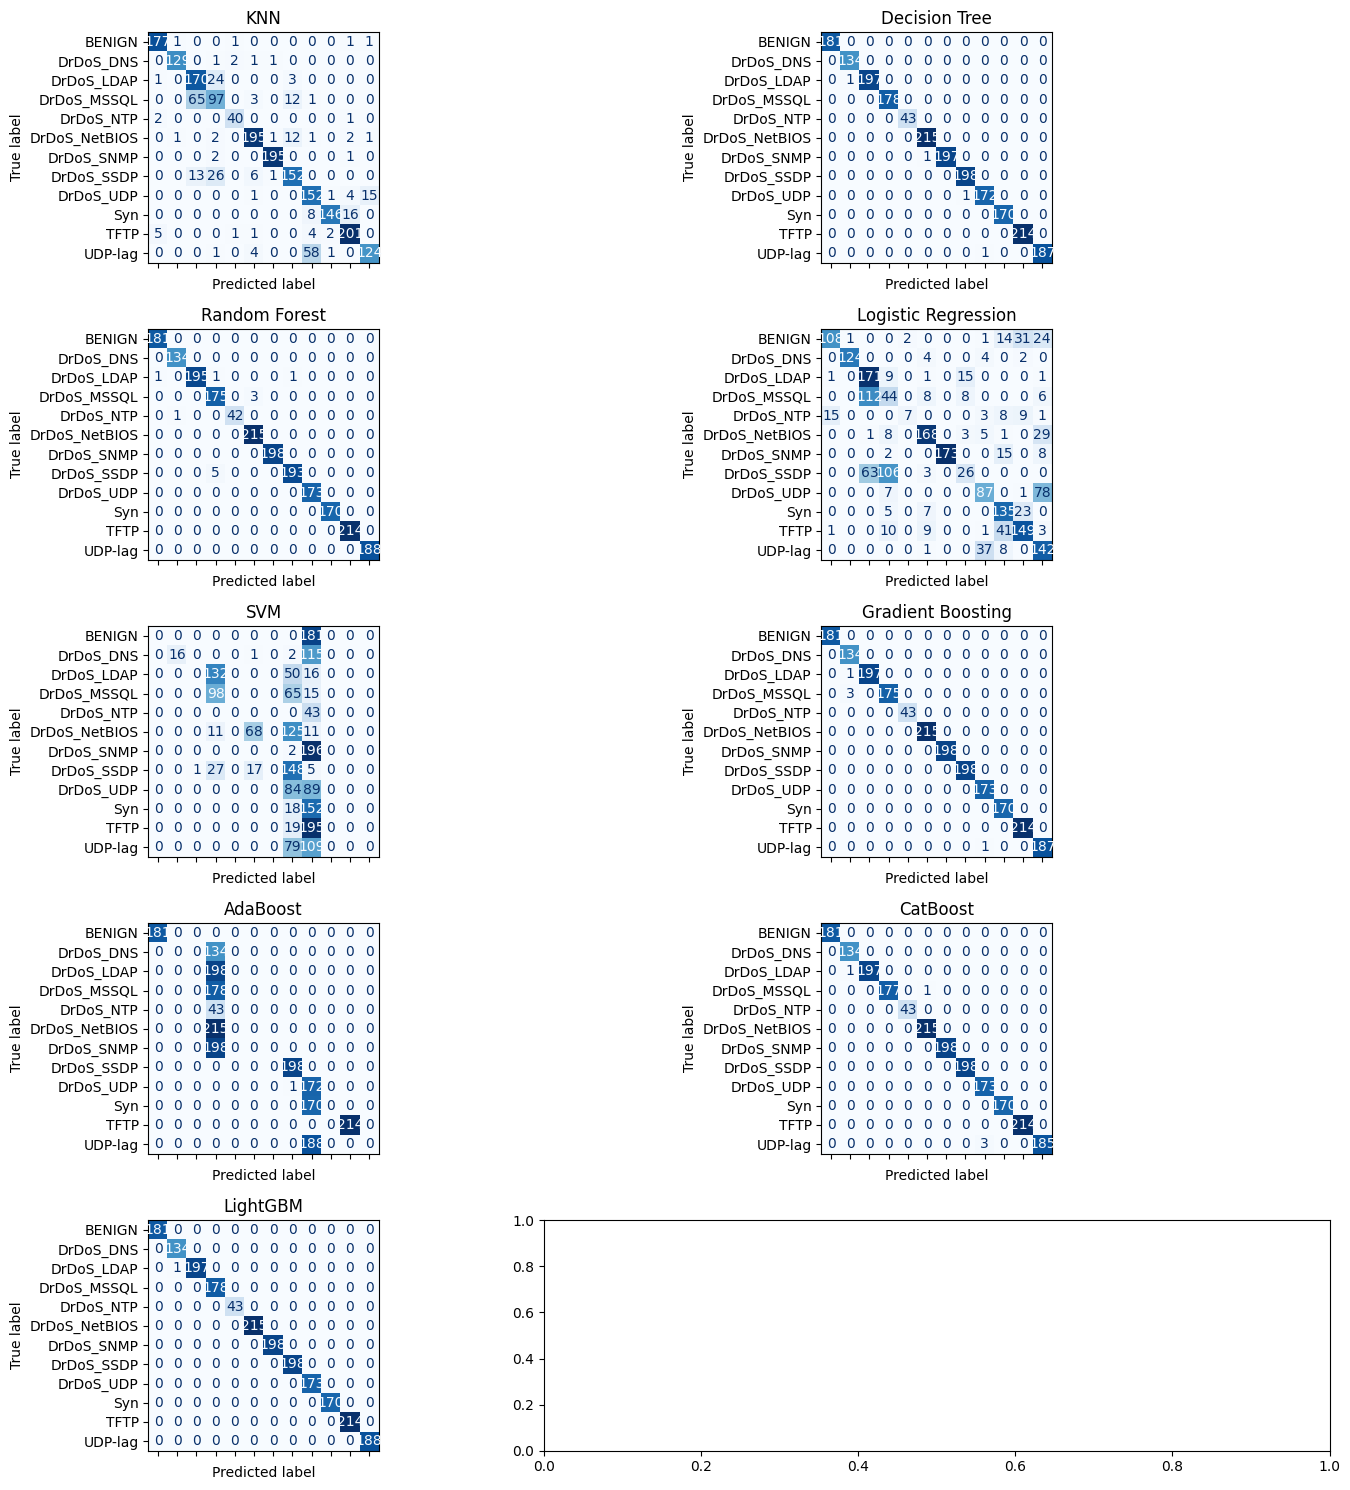

In [37]:
models = {
    "KNN": knn_model_cla,
    #"NB": nb_model_cla,
    "Decision Tree": dt_model_cla,
    "Random Forest": rf_model_cla,
    "Logistic Regression": lr_model_cla,
    "SVM": svm_model_cla,
    'Gradient Boosting': gb_model_cla,
    'AdaBoost': ada_model_cla,
    'CatBoost': catboost_model_cla,
    'LightGBM': lgbm_model_cla,
    #'XgBoost': xgb_model_cla
}

#model_names = list(models.keys()) + ["RNN"]
num_models = len(models)

fig, axes = plt.subplots(nrows=(num_models + 1) // 2, ncols=2, figsize=(15, 15))
ax = axes.ravel()

labels = list(range(len(np.unique(y_test))))

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoders[' Label'].classes_)
    disp.plot(ax=ax[i], cmap=plt.cm.Blues, colorbar=False)
    ax[i].set_title(f"{model_name}")
    ax[i].set_xticklabels([])

#y_pred_probs = rnn_model.predict(X_test_rnn)
#y_pred_rnn = np.argmax(y_pred_probs, axis=1)

#cm_rnn = confusion_matrix(y_test, y_pred_rnn, labels=labels)
#disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=encoders[' Label'].classes_)
#disp_rnn.plot(ax=ax[-1], cmap=plt.cm.Blues, colorbar=False)
#ax[-1].set_title("RNN")

plt.tight_layout()

plt.savefig("confusion_matrices.png", dpi=300)

plt.show()

# **7. Predict**